# Load Data

In [2]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = "archive.zip"

# Directory to extract files
extract_to = "debate_data"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Extracted to: {extract_to}")

✅ Extracted to: debate_data


# Explore Data File Structure

In [3]:
# See what files were extracted
files = os.listdir(extract_to)
print(files[:10])  # Print first 10 files

['data_dir']


In [4]:
import os

# Define path to the subfolder
data_dir_path = os.path.join("debate_data", "data_dir")

# List files inside data_dir
json_files = os.listdir(data_dir_path)
print(json_files[:10])  # Show first 10 files

['october-07-2020.json', 'october-11-1984.json', 'october-11-2000.json', 'october-11-2012.json', 'october-13-1960.json', 'october-13-1988.json', 'october-13-1992.json', 'october-13-2004.json', 'october-15-1992.json', 'october-15-2008.json']


In [5]:
import json
import os

# Define full path to the file
file_path = os.path.join("debate_data", "data_dir", "october-15-2008.json")

# Load JSON
with open(file_path, "r", encoding="utf-8") as f:
    debate = json.load(f)

print(debate.keys())

dict_keys(['content', 'date'])


In [6]:
print(type(debate["content"]))

<class 'list'>


In [7]:
print(debate)

{'content': [{'actor': 'Schieffer', 'dialogue': 'Good evening. And welcome to the third and last presidential debate of 2008, sponsored by the Commission on Presidential Debates. Im Bob Schieffer of CBS News. The rules tonight are simple. The subject is domestic policy. I will divide the next hour-and-a-half into nine-minute segments. I will ask a question at the beginning of each segment. Each candidate will then have two minutes to respond, and then well have a discussion. Ill encourage them to ask follow-up questions of each other. If they do not, I will. The audience behind me has promised to be quiet, except at this moment, when we welcome Barack Obama and John McCain. Gentlemen, welcome. By now, weve heard all the talking points, so lets try to tell the people tonight some things that they  they havent heard. Lets get to it. Another very bad day on Wall Street, as both of you know. Both of you proposed new plans this week to address the economic crisis. Senator McCain, you propos

# Convert to Dataframe

In [8]:
import os
import json
import pandas as pd

# 📂 Define the folder where all debate files are stored
data_dir_path = os.path.join("debate_data", "data_dir")

# 📜 Collect all JSON file paths
json_files = [
    os.path.join(data_dir_path, f)
    for f in os.listdir(data_dir_path)
    if f.endswith(".json")
]

# 📊 List to store data from all files
all_rows = []

# 🔁 Loop through each JSON file
for file_path in json_files:
    with open(file_path, "r", encoding="utf-8") as f:
        debate = json.load(f)
        content = debate.get("content", [])
        date = " ".join(debate.get("date", []))
        
        for entry in content:
            actor = entry.get("actor", "UNKNOWN")
            dialogue = entry.get("dialogue", "")
            all_rows.append({"date": date, "actor": actor, "dialogue": dialogue})

# 🧱 Create one DataFrame
df = pd.DataFrame(all_rows)

# ✅ Preview the result
df.head(20)  # Or use df.tail() to see end

,date,actor,dialogue
0,October 07 2020,Participants,Senator Kamala Harris (D-CA) and
1,October 07 2020,Moderator,Susan Page (USA Today)
2,October 07 2020,Page,Good evening. From the University of Utah in S...
3,October 07 2020,Pence,Thank you.
4,October 07 2020,Page,Senator Harris and Vice President Pence thank ...
5,October 07 2020,Harris,"Thank you Susan. Well, the American people hav..."
6,October 07 2020,Page,"Thank you- Thank you, Senator Harris. Thank yo..."
7,October 07 2020,Pence,Susan thank you. And I want to thank the Commi...
8,October 07 2020,Page,"Thank you, Vice Pres- Thank you Vice President..."
9,October 07 2020,Harris,"Oh, absolutely. Whatever the Vice Presidents c..."


# Explore Dataframe

In [9]:
df.shape

(9243, 3)

In [10]:
df_trump = df[df["actor"] == "Trump"]

In [11]:
df_trump_2020 = df_trump[df_trump["date"].str.contains("2020")]
df_trump_2020.head(30)

,date,actor,dialogue
3960,October 22 2020,Trump,"So, as you know, 2.2 million people, modeled o..."
3964,October 22 2020,Trump,"No, its not a guarantee but it will be by the ..."
3966,October 22 2020,Trump,Johnson and Johnson is doing very well. Modern...
3968,October 22 2020,Trump,"No, I think my timeline is going to be more ac..."
3972,October 22 2020,Trump,I dont think were going to have a dark winter ...
3976,October 22 2020,Trump,I did not say over soon. I say were learning t...
3982,October 22 2020,Trump,Excuse me.
3984,October 22 2020,Trump,I take full responsibility. Its not my fault t...
3988,October 22 2020,Trump,"Look, perhaps just to finish this, I was kiddi..."
3990,October 22 2020,Trump,You certainly did.


# Sentiment Score over Time (VADER)

In [56]:
# Extract the year (assumes format like "October 21 1984")
df["date"] = df["date"].apply(lambda x: x.split()[-1])

# Preview the updated DataFrame
df.head(20)

,date,actor,dialogue
0,1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...
1,1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about..."
2,1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc..."
3,1984,Mr. Mondale,I believe that the question oversimplifies the...
4,1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j..."
5,1984,Mr. Mondale,"We absolutely must, which is why I responded t..."
6,1984,Ms. Geyer,"Mr. President, in the last few months it has s..."
7,1984,The President,"No, but Im glad you asked that question, becau..."
8,1984,Ms. Geyer,"Well, Mr. President, you are implying then tha..."
9,1984,The President,Im afraid I misspoke when I said a CIA head in...


In [57]:
# 📦 Step 1: Install VADER
!pip install vaderSentiment

# 📥 Step 2: Import and Initialize VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

# 📊 Step 3: Apply sentiment analysis to 'dialogue' column
df["sentiment_score"] = df["dialogue"].apply(lambda text: analyzer.polarity_scores(text)["compound"])

# ✅ Step 4: Preview the DataFrame
df.head(20)

,date,actor,dialogue,sentiment_score
0,1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...,0.5267
1,1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about...",-0.6124
2,1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc...",-0.9528
3,1984,Mr. Mondale,I believe that the question oversimplifies the...,0.9408
4,1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j...",-0.8271
5,1984,Mr. Mondale,"We absolutely must, which is why I responded t...",0.7184
6,1984,Ms. Geyer,"Mr. President, in the last few months it has s...",-0.7431
7,1984,The President,"No, but Im glad you asked that question, becau...",0.8196
8,1984,Ms. Geyer,"Well, Mr. President, you are implying then tha...",0.2953
9,1984,The President,Im afraid I misspoke when I said a CIA head in...,-0.3182


In [59]:
avg_sentiment_by_year = df.groupby("date")["sentiment_score"].mean().reset_index()
avg_sentiment_by_year.columns = ["year", "avg_sentiment_score"]

# Show result
avg_sentiment_by_year.head(30)

,year,avg_sentiment_score
0,1960,0.324234
1,1976,0.279629
2,1980,0.221122
3,1984,0.142633
4,1988,0.259765
5,1992,0.189286
6,1996,0.332255
7,2000,0.280824
8,2004,0.147317
9,2008,0.209572


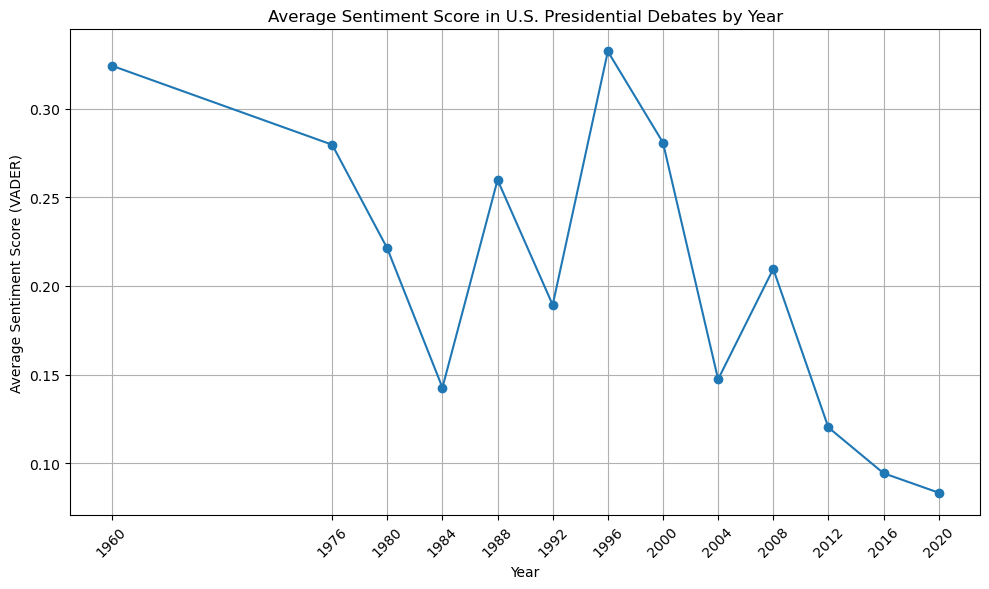

In [60]:
import matplotlib.pyplot as plt

# Ensure years are sorted numerically if they are strings
avg_sentiment_by_year["year"] = avg_sentiment_by_year["year"].astype(int)
avg_sentiment_by_year = avg_sentiment_by_year.sort_values("year")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(
    avg_sentiment_by_year["year"],
    avg_sentiment_by_year["avg_sentiment_score"],
    marker="o",
    linestyle="-"
)
plt.title("Average Sentiment Score in U.S. Presidential Debates by Year")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score (VADER)")
plt.xticks(avg_sentiment_by_year["year"], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sentiment Score over Time (BERT)

In [63]:
!pip install transformers torch --quiet

In [66]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model and tokenizer
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Function to compute soft sentiment score using weighted average over logits
def compute_continuous_bert_scores(dialogues, batch_size=100):
    model.eval()
    scores = []
    with torch.no_grad():
        for i in range(0, len(dialogues), batch_size):
            batch = dialogues[i:i+batch_size]
            inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True)
            outputs = model(**inputs)
            probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

            # Class indices: 0 → 1 star, ..., 4 → 5 stars
            weighted_scores = (probs * torch.tensor([1, 2, 3, 4, 5])).sum(dim=1)
            normalized_scores = (weighted_scores - 3) / 2  # Normalize to [-1, 1]
            scores.extend(normalized_scores.tolist())
    return scores

# Compute and add to DataFrame
df["bert_sentiment_score"] = compute_continuous_bert_scores(df["dialogue"].tolist())

# Show preview
df[["date", "actor", "dialogue", "sentiment_score", "bert_sentiment_score"]].head(10)

,date,actor,dialogue,sentiment_score,bert_sentiment_score
0,1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...,0.5267,0.562642
1,1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about...",-0.6124,0.106398
2,1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc...",-0.9528,-0.359195
3,1984,Mr. Mondale,I believe that the question oversimplifies the...,0.9408,-0.237301
4,1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j...",-0.8271,0.118264
5,1984,Mr. Mondale,"We absolutely must, which is why I responded t...",0.7184,0.711357
6,1984,Ms. Geyer,"Mr. President, in the last few months it has s...",-0.7431,0.138304
7,1984,The President,"No, but Im glad you asked that question, becau...",0.8196,-0.211430
8,1984,Ms. Geyer,"Well, Mr. President, you are implying then tha...",0.2953,-0.140221
9,1984,The President,Im afraid I misspoke when I said a CIA head in...,-0.3182,-0.683205


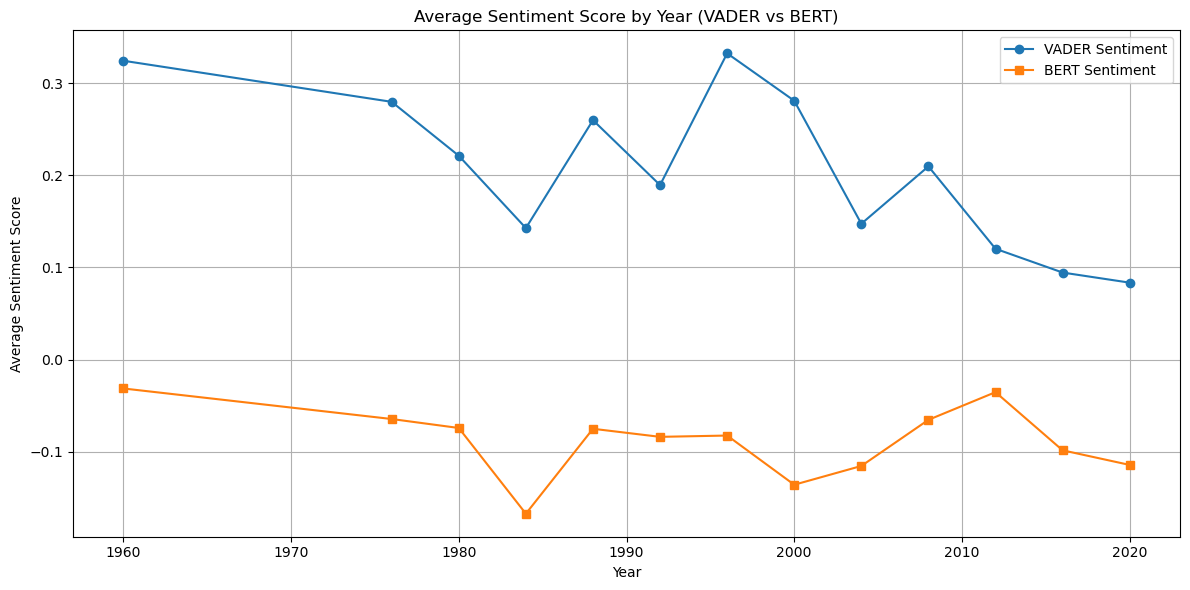

In [67]:
import matplotlib.pyplot as plt

# Ensure 'date' column is int type for grouping
df["year"] = df["date"].astype(int)

# Group by year and compute average scores
yearly_sentiments = df.groupby("year")[["sentiment_score", "bert_sentiment_score"]].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiments["year"], yearly_sentiments["sentiment_score"], label="VADER Sentiment", marker='o')
plt.plot(yearly_sentiments["year"], yearly_sentiments["bert_sentiment_score"], label="BERT Sentiment", marker='s')
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment Score by Year (VADER vs BERT)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
# Group by actor and compute average BERT sentiment score
avg_sentiment_by_actor = df.groupby("actor")["bert_sentiment_score"].mean()

# Sort ascending to get the most negative scores
lowest_sentiment_actors = avg_sentiment_by_actor.sort_values().head(20)

# Display the result
print(lowest_sentiment_actors)

actor
Mr. Fleck           -0.763502
Romnehy             -0.634941
Ms. Giannotti       -0.618740
Degenhart           -0.578848
Result              -0.572321
Governor Clinton    -0.546696
Horstman            -0.479741
Laurent             -0.474862
Mr. Warren          -0.469676
Mr. Cater           -0.451533
Groer               -0.434745
Loomis              -0.428087
Otis                -0.402123
Obrien              -0.392340
Mr. Von Fremd       -0.386612
Quinn               -0.385396
Mr. Maynard         -0.383764
Mitchell            -0.381651
Unidentified Male   -0.379723
Thomas              -0.373403
Name: bert_sentiment_score, dtype: float64


In [70]:
# Group by actor and compute average VADER sentiment score
lowest_vader_sentiment = df.groupby("actor")["sentiment_score"].mean().sort_values().head(20)
print(lowest_vader_sentiment)

actor
Dahle                -0.961200
Barbara Walters      -0.929500
Sander Vanocur       -0.839900
Gibbons              -0.747750
Degenhart            -0.666000
Mr. Niven            -0.561367
President Bush       -0.512467
Jacobs               -0.493900
Ms. Giannotti        -0.481000
Ms. Geyer            -0.426775
Corddry              -0.401100
Ms. Sanders          -0.338400
Mr. Goldfarb         -0.318200
Horstman             -0.296000
Affirmative Action   -0.296000
Long                 -0.296000
Mashek               -0.192882
Ms. Sawyer           -0.172475
Quarles              -0.146200
May                  -0.128000
Name: sentiment_score, dtype: float64


In [73]:
# Filter DataFrame for entries where actor is exactly "Unidentified Male"
unidentified_male_df = df[df["actor"] == "Unidentified Male"]

# Display the first few results
unidentified_male_df.head(10)

,date,actor,dialogue,sentiment_score,bert_sentiment_score,year
8821,2012,Unidentified Male,Governor?,0.0,-0.379723,2012


In [75]:
# Filter DataFrame for entries where actor is exactly "Unidentified Male"
result_df = df[df["actor"] == "Result"]

# Display the first few results
result_df.head(10)

,date,actor,dialogue,sentiment_score,bert_sentiment_score,year
3689,2004,Result,$139 billion windfall profit to the drug compa...,0.7184,-0.572321,2004


In [72]:
# Filter for rows where actor contains 'Trump' (case-insensitive)
trump_df = df[df["actor"].str.contains("Trump", case=False)]

# Calculate average sentiment scores
avg_vader = trump_df["sentiment_score"].mean()
avg_bert = trump_df["bert_sentiment_score"].mean()

# Display results
print(f"Trump - Average VADER Sentiment Score: {avg_vader:.4f}")
print(f"Trump - Average BERT Sentiment Score: {avg_bert:.4f}")

Trump - Average VADER Sentiment Score: 0.0131
Trump - Average BERT Sentiment Score: -0.2435


# Topic Modelling LDA

In [77]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 24.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 81.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

# Number of topics per year (can be tuned)
n_topics = 10

# Function to apply LDA and assign dominant topic to each dialogue
def lda_per_year(df, n_topics=5):
    df = df.copy()
    topic_labels = []

    for year in df['date'].unique():
        yearly_df = df[df['date'] == year]
        dialogues = yearly_df['dialogue'].astype(str).tolist()

        if len(dialogues) < n_topics:
            # Not enough dialogues for topic modeling
            topic_labels.extend([-1] * len(dialogues))
            continue

        # Vectorize
        vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
        X = vectorizer.fit_transform(dialogues)

        # Fit LDA
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)

        # Assign most likely topic
        topic_dists = lda.transform(X)
        top_topics = topic_dists.argmax(axis=1)

        topic_labels.extend(top_topics)

    df["lda_topic"] = topic_labels
    return df

# Apply LDA
df = lda_per_year(df)

In [82]:
# Group by year and list the unique topics assigned in each year
topics_per_year = df[df["lda_topic"] != -1].groupby("date")["lda_topic"].unique()

# Display results
for year, topics in topics_per_year.items():
    print(f"{year}: {sorted(topics)}")

1960: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
1976: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
1980: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
1984: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
1988: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
1992: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
1996: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2000: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2004: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2008: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2012: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2016: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
2020: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to display top words for each topic in each year
def display_lda_topics_by_year(df, n_topics=5, n_top_words=10):
    for year in sorted(df['date'].unique()):
        yearly_df = df[df['date'] == year]
        dialogues = yearly_df['dialogue'].astype(str).tolist()

        if len(dialogues) < n_topics:
            print(f"⏭️ Skipping {year} (not enough dialogues)")
            continue

        print(f"\n🗓️ Year: {year}")
        vectorizer = CountVectorizer(stop_words="english", max_df=0.95, min_df=2)
        X = vectorizer.fit_transform(dialogues)
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)
        words = vectorizer.get_feature_names_out()

        for topic_idx, topic in enumerate(lda.components_):
            top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
            print(f"  🔹 Topic {topic_idx}: {', '.join(top_words)}")

In [93]:
display_lda_topics_by_year(df, n_topics=5, n_top_words=10)


🗓️ Year: 1960
  🔹 Topic 0: think, uh, states, united, believe, years, going, country, people, security
  🔹 Topic 1: america, latin, world, countries, africa, united, freedom, castro, going, mr
  🔹 Topic 2: president, mr, vice, question, uh, nixon, senator, united, position, states
  🔹 Topic 3: president, believe, teachers, salaries, mr, world, senator, peace, uh, strength
  🔹 Topic 4: senator, kennedy, mr, people, think, administration, states, question, united, uh

🗓️ Year: 1976
  🔹 Topic 0: uh, think, people, states, united, president, believe, mr, court, just
  🔹 Topic 1: uh, mr, president, ford, think, people, weve, congress, administration, question
  🔹 Topic 2: uh, tax, percent, people, billion, year, federal, jobs, government, congress
  🔹 Topic 3: governor, carter, president, question, ford, united, thank, uh, response, states
  🔹 Topic 4: country, people, weve, president, world, american, mr, uh, ford, strong

🗓️ Year: 1980
  🔹 Topic 0: cities, oil, think, today, program, soc

# Topic Modelling BERT

In [89]:
!pip install bertopic
!pip install umap-learn hdbscan
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 81.7 MB/s eta 0:00:00:00:01
  Created wheel for hdbscan: filename=hdbscan-0.8.40-cp312-cp312-linux_x86_64.whl size=844867 sha256=685e943c4557836939ede1c51a165f459d64c1965dbeb257e8f72684373b973e
  Stored in directory: /home/ucloud/.cache/pip/wheels/80/e7/bb/173ca0d8ce12718c4b5e6e01619c99653579b56969b97604b2
Successfully built hdbscan
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [bertopic]6/7 [bertopic]transformers]


In [90]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to apply BERTopic per year and assign topics
def apply_bertopic_per_year(df):
    df = df.copy()
    all_topics = []
    all_topic_probs = []

    for year in sorted(df['date'].unique()):
        year_mask = df['date'] == year
        year_dialogues = df.loc[year_mask, 'dialogue'].astype(str).tolist()

        if len(year_dialogues) < 10:
            # Skip small years with too few samples
            all_topics.extend([-1] * len(year_dialogues))
            all_topic_probs.extend([None] * len(year_dialogues))
            continue

        # Fit BERTopic model
        topic_model = BERTopic(verbose=False)
        topics, probs = topic_model.fit_transform(year_dialogues)

        all_topics.extend(topics)
        all_topic_probs.extend(probs)

        # Optional: show top words per topic in this year
        print(f"\n📅 Topics for {year}")
        print(topic_model.get_topic_info().head())

    # Assign topics to DataFrame
    df["bertopic_topic"] = all_topics
    df["bertopic_prob"] = all_topic_probs
    return df

In [91]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to apply BERTopic per year and assign topics
def apply_bertopic_per_year(df):
    df = df.copy()
    all_topics = []
    all_topic_probs = []

    for year in sorted(df['date'].unique()):
        year_mask = df['date'] == year
        year_dialogues = df.loc[year_mask, 'dialogue'].astype(str).tolist()

        if len(year_dialogues) < 10:
            # Skip small years with too few samples
            all_topics.extend([-1] * len(year_dialogues))
            all_topic_probs.extend([None] * len(year_dialogues))
            continue

        # Fit BERTopic model
        topic_model = BERTopic(verbose=False)
        topics, probs = topic_model.fit_transform(year_dialogues)

        all_topics.extend(topics)
        all_topic_probs.extend(probs)

        # Optional: show top words per topic in this year
        print(f"\n📅 Topics for {year}")
        print(topic_model.get_topic_info().head())

    # Assign topics to DataFrame
    df["bertopic_topic"] = all_topics
    df["bertopic_prob"] = all_topic_probs
    return df

In [92]:
df = apply_bertopic_per_year(df)
df[["date", "actor", "dialogue", "bertopic_topic"]].head()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


📅 Topics for 1960
   Topic  Count                        Name  \
0     -1     64           -1_the_that_of_to   
1      0     47            0_the_that_to_in   
2      1     31              1_the_we_of_to   
3      2     27    2_nixon_vice_mr_question   
4      3     19  3_the_candidates_each_will   

                                      Representation  \
0  [the, that, of, to, in, and, we, president, is...   
1    [the, that, to, in, and, of, we, it, have, for]   
2     [the, we, of, to, in, that, and, it, is, have]   
3  [nixon, vice, mr, question, president, for, wi...   
4  [the, candidates, each, will, and, candidate, ...   

                                 Representative_Docs  
0  [My intentions in the field of civil rights ha...  
1  [Mr. Drummond, I am never satisfied with the e...  
2  [Mr. Smith, Mr. Nixon. In the election of 1860...  
3  [Mr. Levy with a question for Vice President N...  
4  [Thank you gentlemen. As we mentioned at the o...  

📅 Topics for 1976
   Topic  Co

,date,actor,dialogue,bertopic_topic
0,1984,Ms. Ridings,Good evening from the Municipal Auditorium in ...,3
1,1984,Mr. Newman,"Dorothy Ridings, thank you. A brief word about...",3
2,1984,Ms. Geyer,"Mr. Mondale, two related questions on the cruc...",5
3,1984,Mr. Mondale,I believe that the question oversimplifies the...,3
4,1984,Ms. Geyer,"Mr. Mondale, if I could broaden the question j...",3


In [100]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 75.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 67.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 90.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:m━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/5 [numpy]
      Successfully uninstalled numpy-2.2.5━━━━━━━━━━━━━━━━━━━━━━━━ 1/5 [numpy]
  Attempting uninstall: scipy╺━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [smart-open]
    Found existing installation: scipy 1.15.3━━━━━━━━━━━━━━━━━ 2/5 [smart-open]
    Uninstalling scipy-1.15.3:━━━━━━━━━━━━━━━━━━━━━━━ 2/5 [smart-open]
      Successfully uninstalled scipy-1.15.3━━━━━━━━━━━━━━━━━━━ 2/5 [smart-open]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [gensim]2m4/5 [gensim]


In [102]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.parsing.preprocessing import STOPWORDS

# Create custom stopword list
custom_stopwords = list(STOPWORDS)

# Convert dialogue column to strings
dialogues = df['dialogue'].astype(str).tolist()

# Vectorizer using Gensim's stopwords
vectorizer = CountVectorizer(stop_words=custom_stopwords, max_df=0.95, min_df=2)
X = vectorizer.fit_transform(dialogues)

# Compute word frequencies
word_counts = X.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()
word_freq = sorted(zip(vocab, word_counts), key=lambda x: x[1], reverse=True)

# Top 200 words
top_200_words = pd.DataFrame(word_freq[:200], columns=["word", "frequency"])

# Display all rows
pd.set_option('display.max_rows', 200)
print(top_200_words)

               word  frequency
0         president       3543
1            people       3286
2             going       2812
3             think       2654
4             thats       2100
5              said       1890
6              want       1809
7              know       1754
8              dont       1716
9                mr       1585
10               im       1576
11          senator       1507
12          country       1493
13            years       1439
14         question       1324
15             time       1287
16              tax       1282
17              got       1279
18             weve       1252
19         american       1216
20            right       1211
21               uh       1198
22             like       1159
23           states       1110
24         governor       1091
25          america       1075
26              way       1020
27          believe       1011
28           united       1006
29            world        968
30             vice        953
31      